In [60]:
!pip install pandas



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
!pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [63]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
!pip install plotly #interactive data visualization


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#interactive': Expected package name at the start of dependency specifier
    #interactive
    ^


In [65]:
import numpy as np #linear algebra
import pandas as pd #data processing,csvfile i/o(ex: pd.read_csv)
#input data files are available in the read only "./input/" directory
#for example,runing this(by clicking run or pressing shift+enter)will list all files under the input directory
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
#you can write up to 20 gb to the current directory(/kaggle/temp/,but they won't be saved between runs)

/kaggle/input/social-media-sentiments-analysis-dataset/sentimendatasetaset.csv
• social media platform generate huge amount of data every day,reflecting people's opions,emotions and reactions on various topics.
•anlyzing these sentiments help to create valuable insights for bussiness,researchers.
project goal:
.understand and analyze the dataset of social media post.
.perform exploratory data analysis (EDA) to understand pattern in the data.
DATASET OVER VIEW:
.social media posts contain  with sentiment labels such as (positive,neagtive,neutral)
.dataset contain timestarmp,likes,hastangs,retweets,likes,country,etc.,

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from collections import Counter

In [67]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\patha\OneDrive\Desktop\sentiment dataset\sentimentdataset.csv",
    encoding="unicode_escape"
)

df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


DATASET INFORMATION AND CLEANING

In [68]:
df.info()#gives total data information help to use in visulization and undeerstand problem in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


in pandas we use drop down operation to clean the data.
(("""EX :df.drop(['Hour']),axis=1,inplace=true"""))
(inplace=True we use this do make the drop operation which is done is true).
after the dropdown command to check weather the data is changed or not 
*uses again df.info* to cross check.
inplace=also consider has its save the derived data from past and give clean data.
also we use assigmment opertor to remove umwanted data from raw data because there may be a chance to use the raw data
ex=df.drop(inplace=True) OR  name=df.dropna()

In [69]:
pd.isnull(df)#givestotal null values in the dataset

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
pd.isnull(df).sum()#checking null values in datasetad also give total null values in each column

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [71]:
#In case any null values are present we can drop/remove those null values using below code
df.dropna(inplace=True)#drop/remove null values from dataset if any null values are present

In [72]:
pip install -U ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
df.shape #gives total number of rows and columns in dataset
#so here to recheck the null values again we use df.shape after dropping null values

(732, 15)

In [74]:
#example:
df_test=pd.isnull(df).sum()# check the changes after dropping null values
#we can you df_test to verify about changes in the dataset

both are same thing
1.df_test.dropna(inplace=True)
2.df_test=df_test.dropna()


Change datatype :
df['x']=df['x'].astype('int')
to check : df['x'].dtype

In [75]:
df.columns#gives all column names in the dataset

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [76]:
if 'Unnamed: 0.1' in df.columns:
    df.drop(columns=['Unnamed: 0.1'], inplace=True)# to drop unwanted column


In [77]:
print(df.columns)#check weather the column is dropped or not


Index(['Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [78]:
df.describe()#Method returns description of the data in the dataframe such as(i.e.,count,mean,std,etc)

,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [79]:
df.rename(columns={'Unnamed: 0':'id'}) #renaming the column name

,id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [80]:
df.duplicated().sum()#checking total duplicate values in dataset
# to dropduplication values we use     df.drop_duplicates(inplace=True)

np.int64(0)

TIMESTAMP CONVERSATION


In [81]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  732 non-null    int64         
 1   Text        732 non-null    object        
 2   Sentiment   732 non-null    object        
 3   Timestamp   732 non-null    datetime64[ns]
 4   User        732 non-null    object        
 5   Platform    732 non-null    object        
 6   Hashtags    732 non-null    object        
 7   Retweets    732 non-null    float64       
 8   Likes       732 non-null    float64       
 9   Country     732 non-null    object        
 10  Year        732 non-null    int64         
 11  Month       732 non-null    int64         
 12  Day         732 non-null    int64         
 13  Hour        732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 80.2+ KB


Social media activity by country (hours,month,years)

In [83]:
#posts per hour,month,year
posts=df.groupby(['Country','Hour','Month','Year']).size().reset_index(name='Num_posts')
posts.head(15)

,Country,Hour,Month,Year,Num_posts
0,Australia,3,9,2019,2
1,Australia,10,1,2023,1
2,Australia,10,3,2023,1
3,Australia,10,6,2022,1
4,Australia,10,8,2010,1
5,Australia,10,11,2015,1
6,Australia,11,4,2017,1
7,Australia,11,10,2017,1
8,Australia,11,10,2022,3
9,Australia,12,1,2023,1


MOST ACTIVE COUNTRY

In [84]:
Country_activity=df.groupby('Country').size().reset_index(name='Num_posts')
most_active_Country=Country_activity.sort_values(by='Num_posts',ascending=False).head(6)

In [85]:
most_active_Country


,Country,Num_posts
100,USA,59
101,USA,55
87,UK,49
17,Canada,44
0,Australia,41
18,Canada,34


Top most active country in social media

In [86]:
Top_Country=most_active_Country.iloc[0]['Country']
Top_Country

' USA'

In [87]:
most_active_Country.head(5)

,Country,Num_posts
100,USA,59
101,USA,55
87,UK,49
17,Canada,44
0,Australia,41


In [88]:
# ensure matching country strings and use existing 'Month' column
Top_Country_monthly = df[df['Country'].str.strip() == Top_Country.strip()].groupby('Month').size().reset_index(name='Num_posts')

In [89]:
Top_Country_monthly.head(5)

,Month,Num_posts
0,1,27
1,2,24
2,3,10
3,4,10
4,5,10


TOP HASHTAGS

In [90]:
from collections import Counter

In [91]:
# collect hashtag strings for posts from the top country (strip spaces to match)
posts_hashtags = df[df['Country'].str.strip() == Top_Country.strip()]['Hashtags'].dropna().tolist()

# extract individual hashtags (without the '#')
Top_Hashtags = []
for post in posts_hashtags:
    Top_Hashtags.extend(re.findall(r'#(\w+)', str(post)))

# show top 5 hashtags for that country
from collections import Counter
Top_Hashtags_count = Counter(Top_Hashtags).most_common(5)
Top_Hashtags_count

[('Euphoria', 4),
 ('Enthusiasm', 3),
 ('Admiration', 3),
 ('Kindness', 3),
 ('Excitement', 3)]

post with highest likes

In [92]:
top_liked_post=df.sort_values(by='Likes',ascending=False).head(5)
top_liked_post[['Text','Sentiment','Platform','Likes','Country']]


,Text,Sentiment,Platform,Likes,Country
570,"Underneath the city lights, the dancer express...",Mesmerizing,Twitter,80.0,USA
345,Motivated to achieve fitness goals after an in...,Motivation,Facebook,80.0,Australia
368,Elation over discovering a rare book in a quai...,Elation,Instagram,80.0,USA
560,"In the serene beauty of a sunset, nature unfol...",Tranquility,Instagram,80.0,Canada
382,A sense of wonder at the vastness of the cosmo...,Wonder,Instagram,80.0,South Africa


Most active users

In [93]:
user_activity=df.groupby(['User','Platform']).size().reset_index(name='Num_Posts')
most_active_Country_per_platform = user_activity.loc[user_activity.groupby('Platform')['Num_Posts'].idxmax()]
most_active_Country_per_platform

,User,Platform,Num_Posts
80,CarnivalDreamer,Facebook,3
152,DawnGardener,Instagram,3
449,PeakConqueror,Twitter,3
135,CulinaryExplorer,Twitter,2


top most tweets

In [94]:
top_retweeted_post=df.sort_values(by='Retweets',ascending=False).head(5)
top_retweeted_post[['Text','Sentiment','Platform','Retweets','Country']]

,Text,Sentiment,Platform,Retweets,Country
560,"In the serene beauty of a sunset, nature unfol...",Tranquility,Instagram,40.0,Canada
540,Celebrating a historic victory in the World Cu...,Joy,Instagram,40.0,Brazil
570,"Underneath the city lights, the dancer express...",Mesmerizing,Twitter,40.0,USA
550,"After a series of defeats, the soccer team fac...",Disappointment,Twitter,40.0,Brazil
510,"At the front row of Adele's concert, each note...",Emotion,Instagram,40.0,USA


top most shared posts 

In [95]:
top_most_shared_post=df.loc[df.groupby('Month')['Retweets'].idxmax()]
top_most_shared_post[['Text','Sentiment','Platform','Retweets','Country','Month']]#ususe this to check most shared post per month

,Text,Sentiment,Platform,Retweets,Country,Month
528,"In the crowd of an Ariana Grande concert, the ...",Euphoria,Facebook,35.0,USA,1
345,Motivated to achieve fitness goals after an in...,Motivation,Facebook,40.0,Australia,2
356,Reflecting on personal growth achieved through...,Reflection,Instagram,35.0,USA,3
413,Inspired by the resilience of a lone tree stan...,Resilience,Facebook,35.0,USA,4
591,Spent the day binge-watching a new series. Pro...,Joy,Facebook,35.0,Canada,5
570,"Underneath the city lights, the dancer express...",Mesmerizing,Twitter,40.0,USA,6
355,Anticipation for an upcoming adventure in an e...,Anticipation,Twitter,40.0,India,7
432,"Heartache deepens, a solitary journey through ...",Despair,Instagram,40.0,South Africa,8
335,Thrilled to witness the grandeur of a cultural...,Thrill,Instagram,40.0,India,9
530,"Captivated by the spellbinding plot twists, th...",Excitement,Twitter,40.0,USA,10


most active users

In [96]:
most_active_sentiment_users=df.groupby(['Sentiment','User']).size().reset_index(name='Num_Posts')
most_active_sentiment_users=most_active_sentiment_users.loc[most_active_sentiment_users.groupby('Sentiment')['Num_Posts'].idxmax()]
most_active_sentiment_users#use this to check most active users per sentiment

,Sentiment,User,Num_Posts
0,Acceptance,AcceptanceSeeker,1
3,Acceptance,ImperfectHarmony,1
8,Accomplishment,FitnessAchiever,1
11,Admiration,MarathonSpectatorRecordBreaking,1
12,Admiration,CharityAdmirer,1
...,...,...,...
698,Wonder,CosmosExplorer,1
699,Wonder,CosmosExplorer,1
700,Wonderment,RainbowChaser,1
701,Yearning,ColdEmbrace,1


(Likes&Retweets)statistics

In [97]:
df['Likes'].agg(['min','max','mean','median','std'])#use this to check likes statistics

min       10.000000
max       80.000000
mean      42.901639
median    43.000000
std       14.089848
Name: Likes, dtype: float64

In [98]:
df[df['Likes']==10]#check the likes by assigning the values#minimum likes is 0 and maximum likes is 80000

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
163,166,Suffering from despair after another setback....,Despair,2021-03-10 08:30:00,StrugglingSoul,Twitter,#Despair #Struggle,5.0,10.0,USA,2021,3,10,8


In [99]:
most_Liked_df = df[df['Likes']==80.0000]#same but maximum likes is 80000
most_Liked_df[['Platform','Country','Likes']]
most_Liked_df.head(5)

,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
335,340,Thrilled to witness the grandeur of a cultural...,Thrill,2020-09-15 14:45:00,CultureEnthusiast,Instagram,#Thrill #CulturalCelebration,40.0,80.0,India,2020,9,15,14
345,350,Motivated to achieve fitness goals after an in...,Motivation,2022-02-28 07:15:00,FitnessJunkie,Facebook,#Motivation #FitnessGoals,40.0,80.0,Australia,2022,2,28,7
355,360,Anticipation for an upcoming adventure in an e...,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.0,80.0,India,2022,7,25,10
368,373,Elation over discovering a rare book in a quai...,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.0,80.0,USA,2018,9,22,16
382,387,A sense of wonder at the vastness of the cosmo...,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23


Sentiment Distridution per Platformand Country

In [100]:
sentiment_platform=df.groupby(['Sentiment','Platform']).size().reset_index(name='Num_posts')
sentiment_platform#check the posts per sentiment as per platform


,Sentiment,Platform,Num_posts
0,Acceptance,Facebook,2
1,Acceptance,Twitter,1
2,Acceptance,Facebook,2
3,Acceptance,Instagram,2
4,Acceptance,Twitter,1
...,...,...,...
416,Wonderment,Twitter,1
417,Yearning,Facebook,1
418,Yearning,Instagram,1
419,Zest,Instagram,1


Most active users country per sentiment

In [101]:
sentiment_Country=df.groupby(['Sentiment','Country']).size().reset_index(name='Num_posts')
sentiment_Country#check the posts per sentiment as per country
sentiment_Country.head(15)

,Sentiment,Country,Num_posts
0,Acceptance,Australia,1
1,Acceptance,Canada,2
2,Acceptance,Australia,2
3,Acceptance,Australia,1
4,Acceptance,Canada,1
5,Acceptance,UK,1
6,Accomplishment,Australia,1
7,Accomplishment,Germany,1
8,Accomplishment,Japan,1
9,Admiration,Kenya,1


Most active users 

In [102]:
activeusers_sentiment_activity=df.groupby(['Sentiment','User']).size().reset_index(name='Num_posts')
activeusers_sentiment_activity

,Sentiment,User,Num_posts
0,Acceptance,AcceptanceSeeker,1
1,Acceptance,DiversityLover,1
2,Acceptance,LifeAcceptance,1
3,Acceptance,ImperfectHarmony,1
4,Acceptance,MosaicArtist,1
...,...,...,...
700,Wonderment,RainbowChaser,1
701,Yearning,ColdEmbrace,1
702,Yearning,VanishedSunset,1
703,Zest,JoyfulDancer,1


Values_Counts for some Columns

In [103]:
df['Platform'].value_counts()

Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [104]:
df['Hashtags'].value_counts()

Hashtags
#Compassionate #TearsOfEmpathy                 3
#Proud #ScalingPeaks                           3
#Hopeful #SeedsOfOptimism                      3
#Playful #CarnivalEscapade                     3
#Hopeful #SailorOfDreams                       2
                                              ..
#ScienceFairWinner #HighSchoolScience          1
#SurpriseCelebration #HighSchoolFriendship     1
#CommunityGiving #HighSchoolPhilanthropy       1
#CulturalCelebration #HighSchoolUnity          1
#TeamSpirit #HighSchoolProjects                1
Name: count, Length: 697, dtype: int64

 imports Visulization Section


In [105]:
import plotly.io as pio
pio.renderers.default='iframe_connected'#set the default renderer to 'iframe_connected' for better interactivity in Jupyter notebooks

In [106]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import IFrame

ploty.express is a high level visualization libraryand help to create quick and easy charts with lee code(Bar chart,Line chart,pie Chart,Scatter plot,Histogram).
graph_object is a low-level plotting library.use for colours,layout,Annotations.           and also can use for custom and professional dashboards
from plotly.subplots import make_subplots : a tool to create multiple plots in one figure.            to show many charts together(dashboards)
from IPython.display import IFrame : used to external inside jypter Notebook

In [107]:
Platform_counts=(df.groupby(['Platform','Country']).size().reset_index(name='count'))

In [108]:
import plotly.io as pio
pio.renderers.default = "browser"

Posts per platform

In [109]:

import plotly.express as px
import pandas as pd

df = pd.read_csv(
    r"C:\Users\patha\OneDrive\Desktop\sentiment dataset\sentimentdataset.csv"
)

fig = px.histogram(
    df,
    x="Platform",
    color="Platform",
    title="Posts per Platform",
    template="plotly_dark",
    color_discrete_map={
        "Twitter":"#22BB8F","Instagram":"#2E8B88","Facebook":"#F4A261","Twitter":
        "#29884F8F"
        }
)

fig.show()

This visulization represents the distribution of posts across different social media platform.

In [110]:
import plotly.io as pio
pio.templates.default = "plotly_dark"


Overall Sentiment Distribution

In [111]:
sentiment_counts = (
    df['Sentiment']
    .value_counts()
    .reset_index()
)
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.bar(
    sentiment_counts,
    x='Sentiment',
    y='Count',
    color="Sentiment",
    template="plotly_dark",
    title='Overall Sentiment Distribution',
    color_discrete_map={"Positive": "#22BB85", "Negative": "#FF4C4C"}
)

fig.show()


This visulization indicates the overall feedback in the dataset showing the distributin of  positive or neagtive sentiment based on the sentimental analysis posts.

Likes vs Retweets

In [112]:
fig = px.scatter(
    df,
    x='Likes',
    y='Retweets',
    color='Sentiment',
    title='Likes vs Retweets',
    )

fig.show()


This Scatter plot represent the relationship between likes and retweets for posts,with different colors represent differnt social media platforms. 

TOP 5 Countries by number of posts :

In [113]:
top_countries = (
    df['Country']
    .value_counts()
    .head(5)
    .reset_index()
)

top_countries.columns = ['Country', 'Count']

fig = px.bar(
    top_countries,
    x="Country",
    y="Count",
    color="Country",
    template="plotly_dark",
    text="Count",
    title="Top 5 Countries by Number of Posts",
)

fig.show()


It says  among top 5 Country posts which country has the highestnumber of posts in the dataset.

Ploty per Sentiment : 

In [114]:
platform_counts = (
    df['Platform']
    .value_counts()
    .reset_index()
)
platform_counts.columns = ['Platform', 'Count']

fig = px.bar(
    platform_counts,
    x='Platform',
    y='Count',
    color='Platform',
    barmode='group',
    title='Platform per Sentiment',
    template='plotly_dark'
)

fig.show()


This bar chart shows the total number of posts across different social media platforms in the dataset. It helps identify the most active platforms and understand where user engagement is highest.

Platform Distribution 

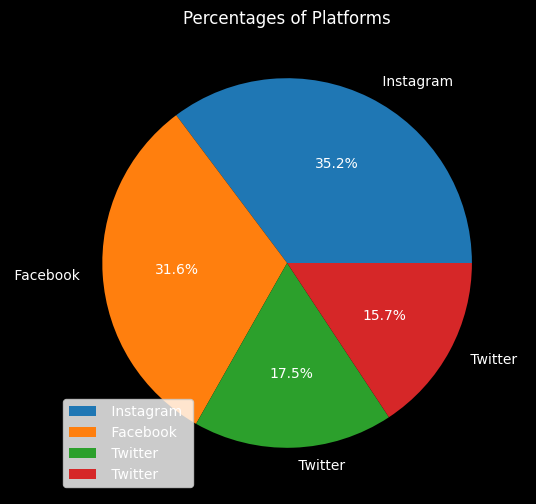

In [115]:
import matplotlib.pyplot as plt

# Create figure and axis with black background
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Pie chart
df['Platform'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    textprops={'color': 'white'},
    ax=ax
)

# Title
ax.set_title('Percentages of Platforms', color='white')

# Legend
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('white')

plt.ylabel('')  # remove default ylabel
plt.show()


This chart shows how many posts are made on each platform.